# Imports and Data

In [5]:
%pip install matplotlib
%pip install plotly
%pip install scipty
%pip install dataclasses

You should consider upgrading via the 'C:\Users\shapi\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\shapi\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement scipty (from versions: none)
ERROR: No matching distribution found for scipty
You should consider upgrading via the 'C:\Users\shapi\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\shapi\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [26]:
# Imports
import pickle
import numpy as np
from matplotlib.pyplot import cm
from matplotlib import pyplot as plt
from matplotlib import patches
from copy import deepcopy
import plotly.graph_objects as go
from scipy.optimize import curve_fit
from dataclasses import make_dataclass
import os

import sys
module_path = 'code' 
if module_path not in sys.path:
    sys.path.append(module_path)
    
np.set_printoptions(threshold=sys.maxsize)

# Markus's code
from MM_Plot_Utils import plot, hist
from MM_Maze_Utils import *
from MM_Traj_Utils import *
from DORA_Utils_Utils import *
from DORA_Calc_Utils import *
from DORA_Plot_Utils import *

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [128]:
UnrewNames=['B5','B6','B7','D3','D4','D5','D6','D7','D8','D9']
RewNames=['B1','B2','B3','B4','C1','C3','C6','C7','C8','C9']
UnrewNamesSub=['B5','B6','B7','D3','D4','D5','D7','D8','D9'] # excluding D6 which barely entered the maze
AllNames=RewNames+UnrewNames

# Calculations

In [18]:
ma=NewMaze(6)

## Backward Bias Walk

In [58]:
betas1 = np.linspace(0.2,2,10,endpoint=True)
betas2 = np.linspace(3,10,8,endpoint=True)
betas3 = np.linspace(50,500,10,endpoint=True)
betas = np.concatenate((betas1,betas2,betas3))
print(betas)
gammas = [0]
print(gammas)
etas = [0]
print(etas)
deltas = np.linspace(0,1,10, endpoint=False)
print(deltas)
params = [betas,gammas,etas,deltas]
param_names = ['beta','gamma','eta','delta']

[2.0e-01 4.0e-01 6.0e-01 8.0e-01 1.0e+00 1.2e+00 1.4e+00 1.6e+00 1.8e+00
 2.0e+00 3.0e+00 4.0e+00 5.0e+00 6.0e+00 7.0e+00 8.0e+00 9.0e+00 1.0e+01
 5.0e+01 1.0e+02 1.5e+02 2.0e+02 2.5e+02 3.0e+02 3.5e+02 4.0e+02 4.5e+02
 5.0e+02]
[0]
[0]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


### Calculate CEs by test states

In [59]:
model_name = 'backward-bias_test'
subdir = 'outdata_DORA/' + model_name + '/'
fstr_ces = subdir + '%s_ces_' + model_name + '.npy'

In [ ]:
os.makedirs(subdir, exist_ok=True)    
OutCEs(names=UnrewNamesSub,params=params,ma=ma,fstr=fstr_ces)

### Get minimum parameters

In [60]:
# Minimum parameters
np.save(subdir + 'ces_argmin_' + model_name + '.npy',
        GetMinArgList(Names=UnrewNamesSub,fstr_load=fstr_ces,parameters=params,avg=False))

In [61]:
mins,argmins = np.load(subdir + 'ces_argmin_' + model_name + '.npy', allow_pickle=True)
print(mins)
avg,sd = GetAvgAndSD(mins)
print('Average cross-entropy loss with minimum parameter: ' + str(avg) + ' +- ' + str(sd))
print(argmins)

[1.578782040737849 1.5801521759715516 1.6061821933773353 1.607352886038997
 1.600364035251194 1.5067804427423448 1.4863995174927638
 1.5332978330683749 1.5777073403341737]
Average cross-entropy loss with minimum parameter: 1.56 +- 0.04
[list([0.2, 0, 0, 0.8]) list([0.2, 0, 0, 0.8]) list([0.6, 0, 0, 0.9])
 list([0.6, 0, 0, 0.9]) list([0.6, 0, 0, 0.9]) list([0.2, 0, 0, 0.5])
 list([0.2, 0, 0, 0.4]) list([0.2, 0, 0, 0.5]) list([8.0, 0, 0, 0.8])]


In [9]:
# get average of parameters
clean_argmin = [list(item) for item in argmins]
print(np.mean(clean_argmin,axis=0))

[1.2        0.         0.         0.72222222]


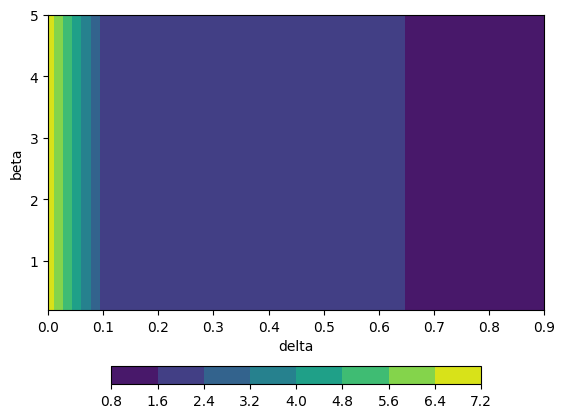

In [10]:
# fixed params by index of closest to average parameter in params list
fixed_params = [5, 0, 0, 7]
fig,_ = PlotTopologyRand(UnrewNamesSub, fstr_ces, params, fixed_params)

In [11]:
url = subdir+'topology_' + model_name + '.pdf'
fig.savefig(url,bbox_inches="tight")

### Calculate CE with mimimum parameter at every step, plot and get average

In [62]:
url_ces = subdir+'ces_' + model_name + '.npy'

In [138]:
OutCEsNamesParams(UnrewNamesSub,argmins,ma,url=url_ces)

KeyboardInterrupt: 

### Simulate for efficiency

In [63]:
nbouts = 100
fstr_sim = subdir + '%s_sim_' + model_name + '_' + str(nbouts) + '-bouts.npy'

In [64]:
RunSim(UnrewNamesSub, argmins, nbouts, ma, fstr=fstr_sim)

[array([  0,   1,   0, 127,   0,   2,   5,   2,   0,   1,   3,   1,   0,
          2,   0,   1,   3,   8,  17,  35,  17,  36,  74,  36,  74,  36,
         17,  36,  73,  36,  74,  36,  74,  36,  17,  36,  73,  36,  17,
         35,  17,   8,  17,  36,  17,  35,  72,  35,  17,   8,  18,  37,
         18,   8,  17,  35,  72,  35,  72,  35,  17,   8,  18,   8,  18,
         38,  77,  38,  77,  38,  78,  38,  77,  38,  78,  38,  77,  38,
         78,  38,  78,  38,  78,  38,  78,  38,  77,  38,  77,  38,  18,
         37,  18,   8,  17,  35,  71,  35,  17,  35,  17,  36,  73,  36,
         74,  36,  17,  36,  74,  36,  17,  36,  74,  36,  73,  36,  17,
          8,  17,  36,  17,  35,  72,  35,  17,  35,  17,   8,   3,   7,
         16,  33,  67,  33,  67,  33,  68,  33,  16,  34,  69,  34,  70,
         34,  70,  34,  16,   7,  16,  33,  68,  33,  16,  33,  68,  33,
         68,  33,  68,  33,  67,  33,  67,  33,  67,  33,  67,  33,  67,
         33,  68,  33,  16,  33,  68,  33,  67,  33

In [65]:
eff = GetEfficiency(UnrewNamesSub,fstr_sim)
avg,sd = GetAvgAndSD(eff)
print('Average efficiency of mice with minimum parameters: ' + str(avg) + ' +- ' + str(sd) + ' (SD)')
avgexp,sdexp = GetAvgAndSD(ExplainedEfficiency(eff))
print('Which explains, on average: ' + str(avgexp) + ' +- ' + str(sdexp) + ' (SD)')

Average efficiency of mice with minimum parameters: 0.23 +- 0.05 (SD)
Which explains, on average: 0.61 +- 0.17 (SD)


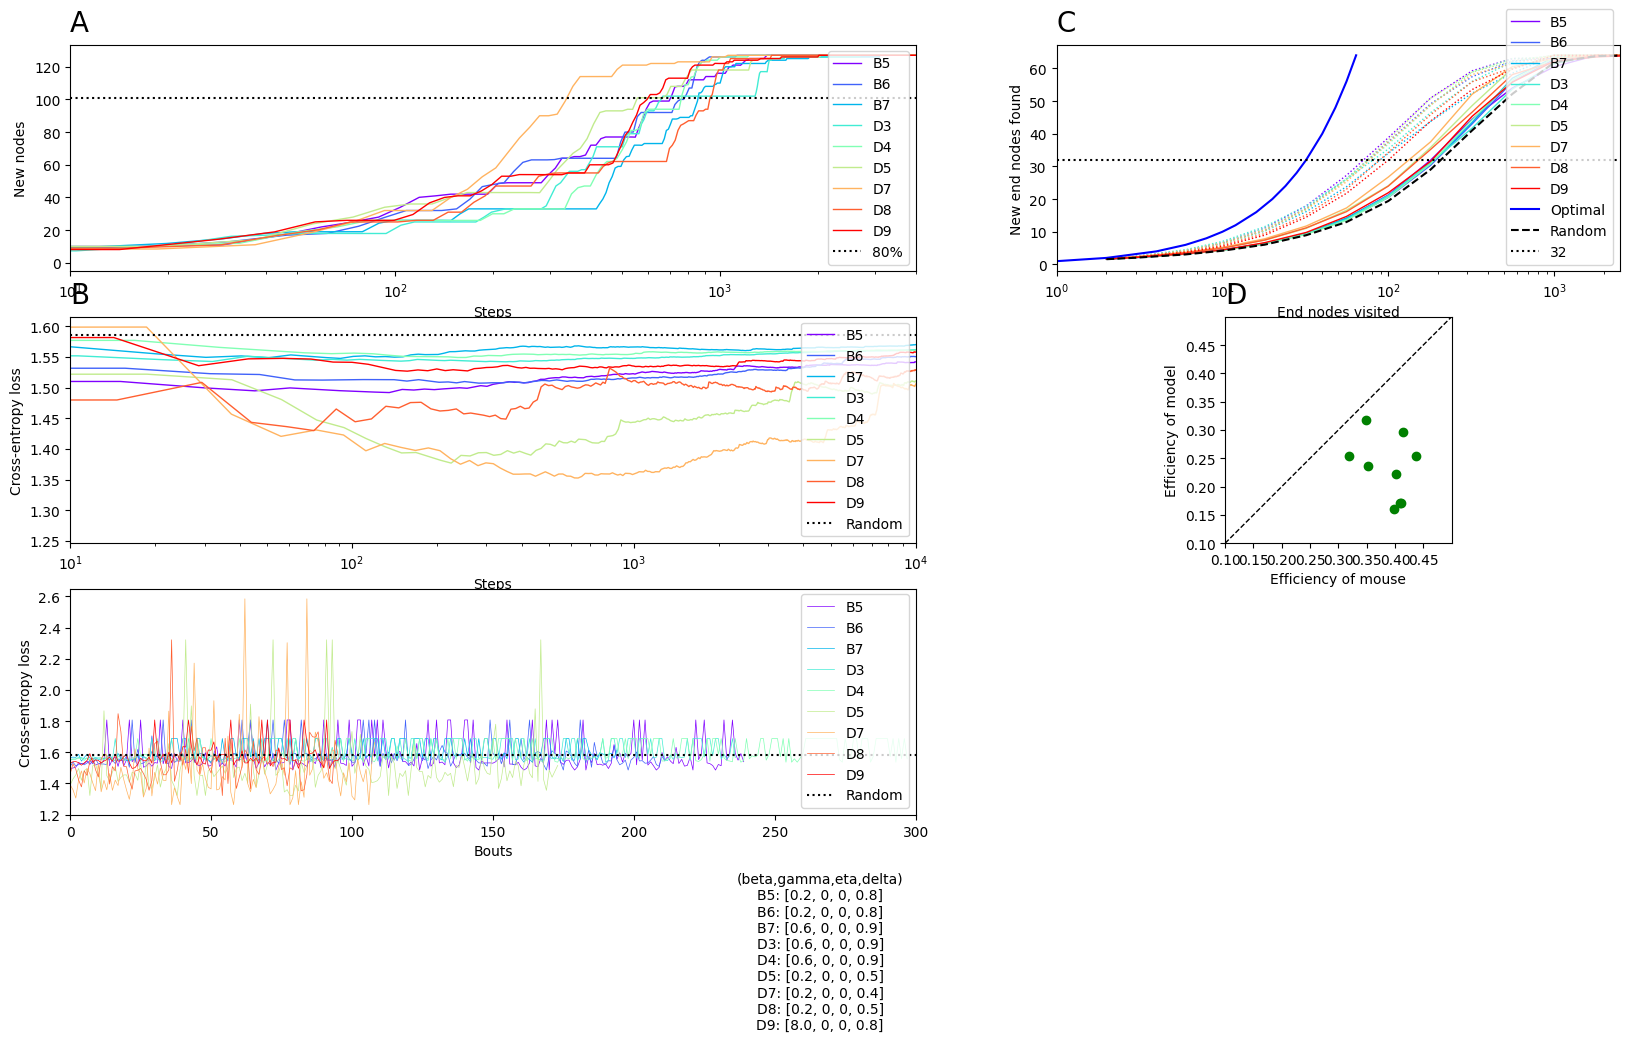

In [66]:
model_name = 'backward-bias_test'
subdir = 'outdata_DORA/' + model_name + '/'
nbouts = 100
fstr_sim = subdir + '%s_sim_' + model_name + '_' + str(nbouts) + '-bouts.npy'
eff = GetEfficiency(UnrewNamesSub,fstr_sim)
param_names = ['beta','gamma','eta','delta']
mins,argmins = np.load(subdir + 'ces_argmin_' + model_name + '.npy', allow_pickle=True)
url_ces = subdir + 'ces_' + model_name + '.npy'
fig,_ = PlotMin(UnrewNamesSub,argmins,param_names,url_ces,fstr_sim,eff)

In [67]:
url = subdir + model_name + '_' + str(nbouts) + '-bouts.pdf'
fig.savefig(url,bbox_inches="tight")

## ADORA

In [68]:
betas1 = np.linspace(0.2,2,5,endpoint=True)
betas2 = np.linspace(3,10,4,endpoint=True)
betas3 = np.linspace(50,500,5,endpoint=True)
betas = np.concatenate((betas1,betas2,betas3))
print(betas)
gammas = np.linspace(0,1,5,endpoint=True)
print(gammas)
etas = np.linspace(0,1,5, endpoint=True)
print(etas)
deltas = np.linspace(0,1,5, endpoint=False)
print(deltas)
params = [betas,gammas,etas,deltas]
param_names = ['beta','gamma','eta','delta']

[2.00000000e-01 6.50000000e-01 1.10000000e+00 1.55000000e+00
 2.00000000e+00 3.00000000e+00 5.33333333e+00 7.66666667e+00
 1.00000000e+01 5.00000000e+01 1.62500000e+02 2.75000000e+02
 3.87500000e+02 5.00000000e+02]
[0.   0.25 0.5  0.75 1.  ]
[0.   0.25 0.5  0.75 1.  ]
[0.  0.2 0.4 0.6 0.8]


### Calculate CEs by test states

In [69]:
model_name = 'ADORA_test'
subdir = 'outdata_DORA/' + model_name + '/'
fstr_ces = subdir + '%s_ces_' + model_name + '.npy'

In [ ]:
os.makedirs(subdir, exist_ok=True)    
OutCEs(names=UnrewNamesSub,params=params,ma=ma,fstr=fstr_ces)

### Get minimum parameters

In [37]:
# Minimum parameters
np.save(subdir + 'ces_argmin_' + model_name + '.npy',
        GetMinArgList(Names=UnrewNamesSub,fstr_load=fstr_ces,parameters=params,avg=False))

In [70]:
mins,argmins = np.load(subdir + 'ces_argmin_' + model_name + '.npy', allow_pickle=True)
print(mins)
avg,sd = GetAvgAndSD(mins)
print('Average cross-entropy loss with minimum parameter: ' + str(avg) + ' +- ' + str(sd))
print(argmins)

[1.3631644405421868 1.4378974713004795 1.1835827991642511
 1.1035526807437588 1.1192912784134128 1.4669219398726272
 1.4662096973339214 1.5260800863975827 1.5055707298595167]
Average cross-entropy loss with minimum parameter: 1.35 +- 0.16
[list([3.0, 0.8, 0.8, 0.4]) list([2.0, 0.8, 0.8, 0.6])
 list([5.3, 0.5, 0.8, 0.8]) list([7.7, 0.5, 0.8, 0.4])
 list([7.7, 0.5, 0.8, 0.4]) list([2.0, 0.8, 0.8, 0.4])
 list([2.0, 0.5, 1.0, 0.4]) list([1.6, 0.5, 1.0, 0.6])
 list([3.0, 0.5, 0.8, 0.6])]


In [39]:
# get average of parameters
clean_argmin = [list(item) for item in argmins]
print(np.mean(clean_argmin,axis=0))

[3.81111111 0.6        0.84444444 0.51111111]


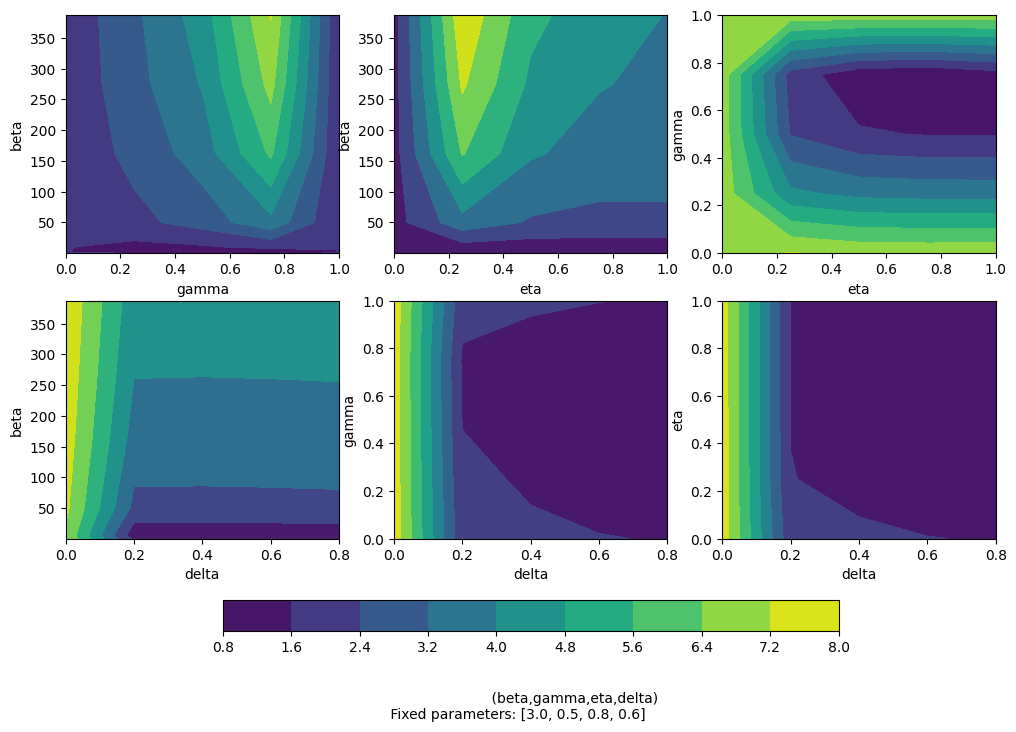

In [41]:
# fixed params by index of closest to average parameter in params list
fixed_params = [5, 2, 3, 3]
fig,_ = PlotTopology4(UnrewNamesSub, fstr_ces, params, fixed_params)

In [42]:
url = subdir+'topology_' + model_name + '.pdf'
fig.savefig(url,bbox_inches="tight")

### Calculate CE with mimimum parameter at every step, plot and get average

In [71]:
url_ces = subdir+'ces_' + model_name + '.npy'

In [ ]:
OutCEsNamesParams(UnrewNamesSub,argmins,ma,url=url_ces)

### Simulate for efficiency

In [72]:
nbouts = 100
fstr_sim = subdir + '%s_sim_' + model_name + '_' + str(nbouts) + '-bouts.npy'

In [ ]:
RunSim(UnrewNamesSub, argmins, nbouts, ma, fstr=fstr_sim)

In [73]:
eff = GetEfficiency(UnrewNamesSub,fstr_sim)
avg,sd = GetAvgAndSD(eff)
print('Average efficiency of mice with minimum parameters: ' + str(avg) + ' +- ' + str(sd) + ' (SD)')
avgexp,sdexp = GetAvgAndSD(ExplainedEfficiency(eff))
print('Which explains, on average: ' + str(avgexp) + ' +- ' + str(sdexp) + ' (SD)')

Average efficiency of mice with minimum parameters: 0.4 +- 0.16 (SD)
Which explains, on average: 1.01 +- 0.38 (SD)


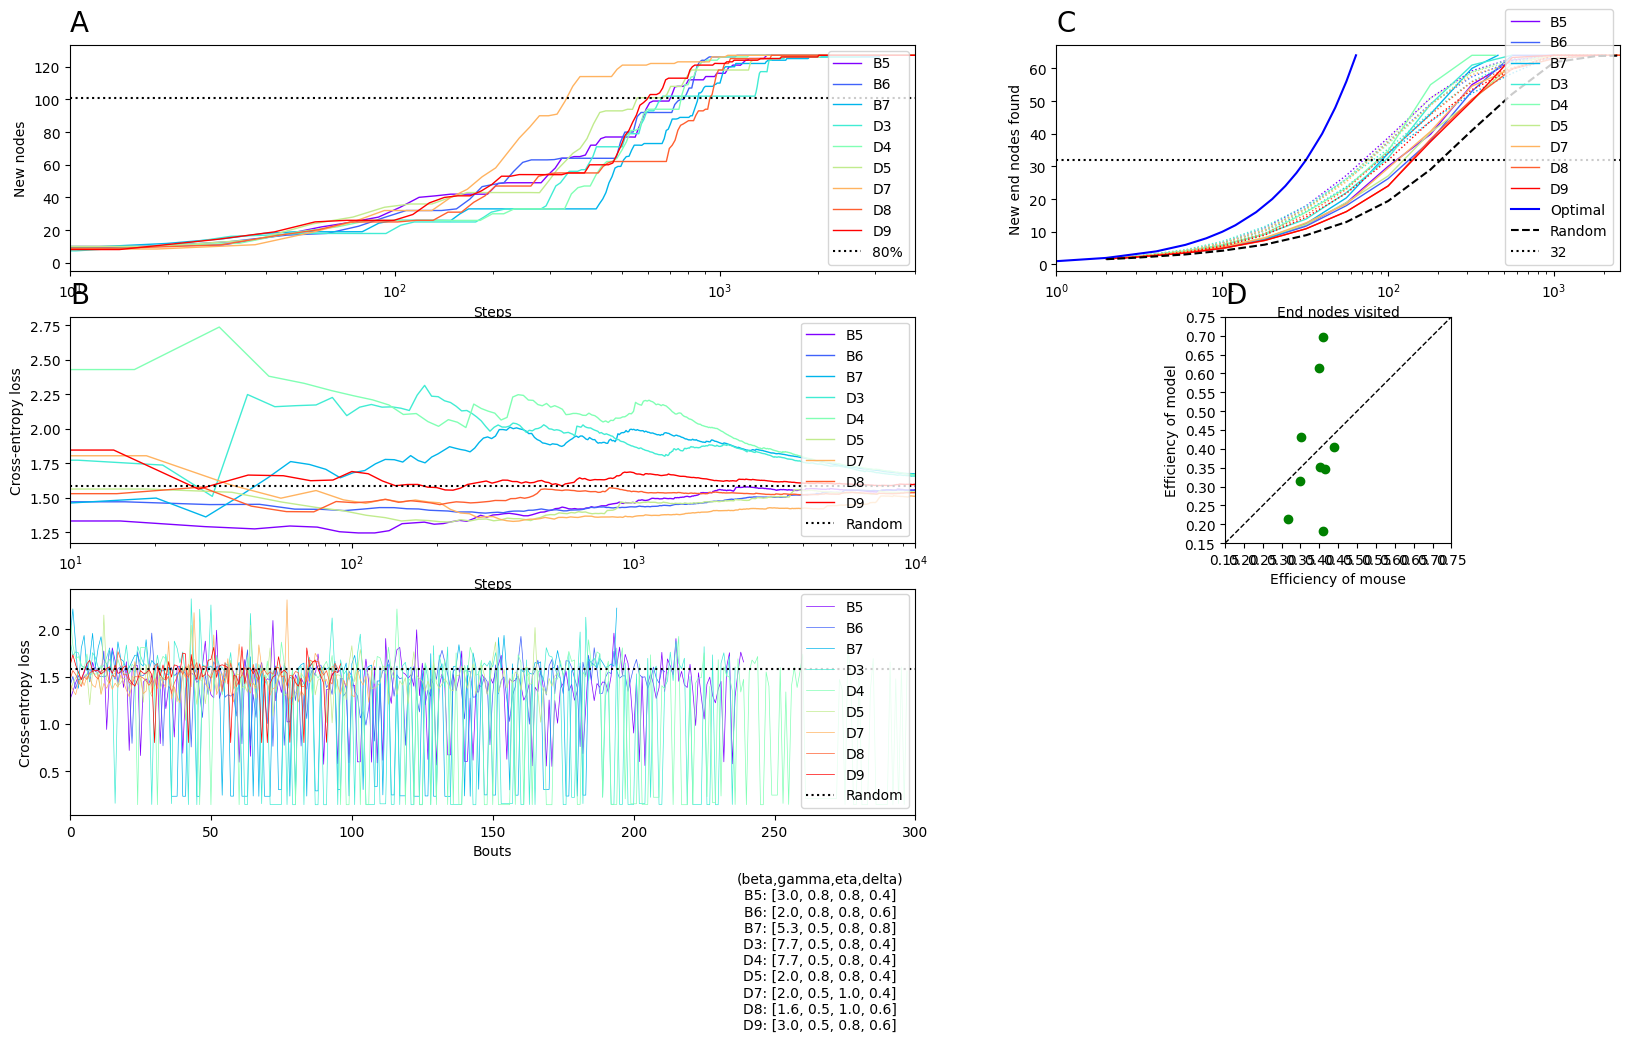

In [74]:
model_name = 'ADORA_test'
subdir = 'outdata_DORA/' + model_name + '/'
nbouts = 100
fstr_sim = subdir + '%s_sim_' + model_name + '_' + str(nbouts) + '-bouts.npy'
eff = GetEfficiency(UnrewNamesSub,fstr_sim)
param_names = ['beta','gamma','eta','delta']
mins,argmins = np.load(subdir + 'ces_argmin_' + model_name + '.npy', allow_pickle=True)
url_ces = subdir + 'ces_' + model_name + '.npy'
fig,_ = PlotMin(UnrewNamesSub,argmins,param_names,url_ces,fstr_sim,eff)

In [75]:
url = subdir + model_name + '_' + str(nbouts) + '-bouts.pdf'
fig.savefig(url,bbox_inches="tight")

## Plot Cross-entropy comparison

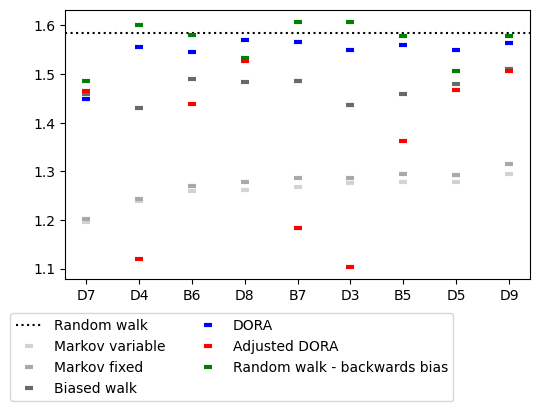

In [76]:
with open('outdata/BZentropies', 'rb') as f:
    _,en=pickle.load(f)  
with open('outdata/FixEntropies-TJ1-EX1-Split5-LevelsLR', 'rb') as f:
    _,ef=pickle.load(f)  
with open('outdata/VarEntropies-TJ1-EX1-Split5-LevelsLR', 'rb') as f:
    _,ev=pickle.load(f)  
with open('outdata/FourBiasEntropies-TJ1-EX1-Split5', 'rb') as f:
    _,eb=pickle.load(f)  
    
k=len(RewNames)
UN=np.array(UnrewNamesSub)
ev=np.array(ev);ef=np.array(ef);eb=np.array(eb);en=np.array(en)
evu=ev[k:];efu=ef[k:];ebu=eb[k:];enu=en[k:]
siu=np.argsort(evu)

min1,_ = np.load('outdata_DORA/1mode_0.8percent/ces_argmin_1mode_-1frame_0.8percent.npy', allow_pickle=True)
minrand,_ = np.load('outdata_DORA/backward-bias_test/ces_argmin_backward-bias_test.npy', allow_pickle=True)
min4,_ = np.load('outdata_DORA/ADORA_test/ces_argmin_ADORA_test.npy', allow_pickle=True)

fig,ax = plt.subplots()

ax.axhline(y=-np.log2(1/3), linestyle=':', color='k', label='Random walk') # plot random policy line
ax.plot(np.arange(len(UN)),evu[siu],linestyle='',color='lightgray',marker='_',markersize=6,markeredgewidth=3, label='Markov variable')
ax.plot(np.arange(len(UN)),efu[siu],linestyle='',color='darkgray',marker='_',markersize=6,markeredgewidth=3, label='Markov fixed')
ax.plot(np.arange(len(UN)),ebu[siu],linestyle='',color='dimgray',marker='_',markersize=6,markeredgewidth=3, label='Biased walk')
ax.plot(np.arange(len(UN)),min1[siu],'b_',markersize=6,markeredgewidth=3,label='DORA')
ax.plot(np.arange(len(UN)),min4[siu],'r_',markersize=6,markeredgewidth=3,label='Adjusted DORA')
ax.plot(np.arange(len(UN)),minrand[siu],'g_',markersize=6,markeredgewidth=3,label='Random walk - backwards bias')

ax.legend(ncol=2,bbox_to_anchor=(0.85, -0.1))
ax.set_xticks(list(np.arange(len(UN))),list(UN[siu]))
fig.set_figheight(3.5)
fig.set_figwidth(6)

In [145]:
fig.savefig('outdata_DORA/model_comparison_backward_bias_test.pdf',bbox_inches="tight")

## Left-Right Bias

In [113]:
names = UnrewNamesSub.copy()

In [122]:
lrbias = []
for nickname in names:
    lrbias.append(GetLeftRightBias(nickname, ma))
print(lrbias)
print(GetAvgAndSD(lrbias))

[0.5275377969762419, 0.48491518839829084, 0.48939608159967685, 0.4862684847320914, 0.5007826610475618, 0.5273315363881401, 0.517259978425027, 0.4947759142150124, 0.5161563425991251]
(0.5, 0.02)


In [123]:
maxpercent = 0.8
maxsteps = NewNodesBiggerThanPercent(names,maxpercent)
lrbias = []
for nickname,steps in zip(names,maxsteps):
    lrbias.append(GetLeftRightBias(nickname, ma, steps))
print(lrbias)
print(GetAvgAndSD(lrbias))

[0.47752808988764045, 0.4593908629441624, 0.48717948717948717, 0.486404833836858, 0.5065616797900262, 0.5018050541516246, 0.5529411764705883, 0.5074946466809421, 0.46688741721854304]
(0.49, 0.03)
